# Step 1: Data Loading

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("correlation-regression-dataset-non-linear.csv")

df.head()

,advertising_budget,social_media_followers,sales
0,1000,2000,152000
1,2000,4000,50000
2,3000,6000,138000
3,4000,8000,124000
4,5000,10000,96000


# Step 2: Preprocessing the Data

In [3]:
print(df.isnull().sum())

advertising_budget        0
social_media_followers    0
sales                     0
dtype: int64


In [5]:
scaler = StandardScaler()
df[['advertising_budget', 'social_media_followers', 'sales']] = scaler.fit_transform(df[['advertising_budget', 'social_media_followers', 'sales']])

In [6]:
print(df.describe())

       advertising_budget  social_media_followers         sales
count        2.000000e+01            2.000000e+01  2.000000e+01
mean         2.220446e-17            1.110223e-17  1.110223e-17
std          1.025978e+00            1.025978e+00  1.025978e+00
min         -1.647509e+00           -1.899481e+00 -1.719981e+00
25%         -8.237545e-01           -7.890151e-01 -8.159480e-01
50%          0.000000e+00            2.630050e-01  5.331478e-02
75%          8.237545e-01            8.182379e-01  8.240611e-01
max          1.647509e+00            1.373471e+00  1.594807e+00


# Step 3: Exploratory Data Analysis (EDA)

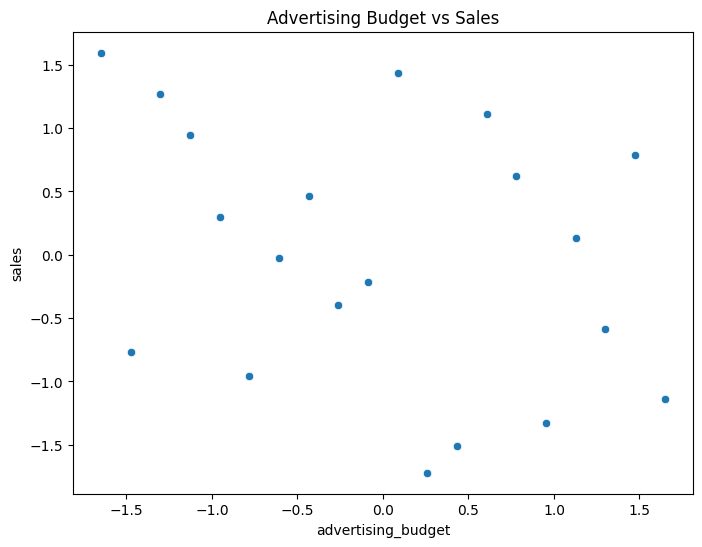

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['advertising_budget'], y=df['sales'])
plt.title("Advertising Budget vs Sales")
plt.show()

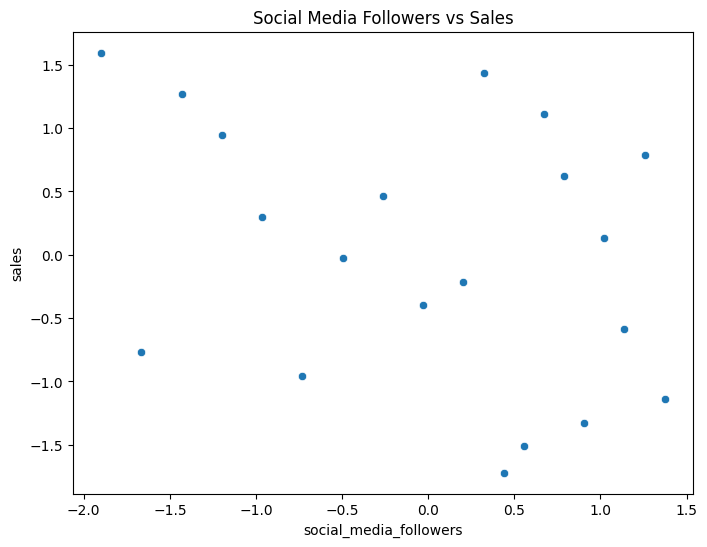

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['social_media_followers'], y=df['sales'])
plt.title("Social Media Followers vs Sales")
plt.show()

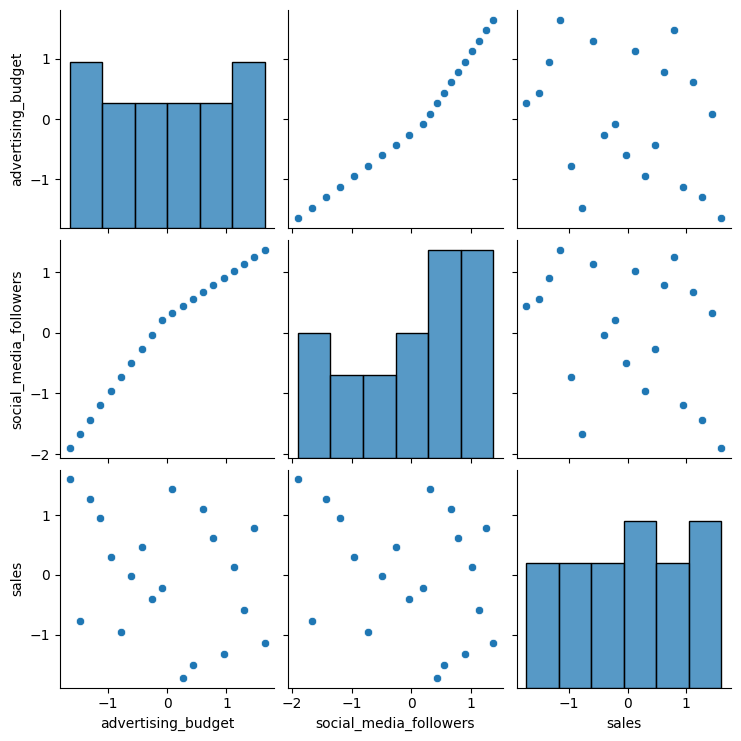

In [10]:
sns.pairplot(df)
plt.show()

# Step 4: Feature Engineering (Polynomial Features)

In [12]:
X = df[['advertising_budget', 'social_media_followers']]

In [13]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [14]:
print(X_poly[:5])

[[ 1.         -1.64750894 -1.8994808   2.71428571  3.12941161  3.60802733]
 [ 1.         -1.47408695 -1.66569855  2.17293233  2.45538449  2.77455167]
 [ 1.         -1.30066495 -1.4319163   1.69172932  1.86244335  2.05038429]
 [ 1.         -1.12724296 -1.19813405  1.27067669  1.35058817  1.43552519]
 [ 1.         -0.95382097 -0.96435179  0.90977444  0.91981896  0.92997438]]


# Step 5: Model Selection and Training

In [15]:
y = df['sales']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

# Step 6: Evaluate Performance

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2.6259696013881246


# Step 7: Visualization

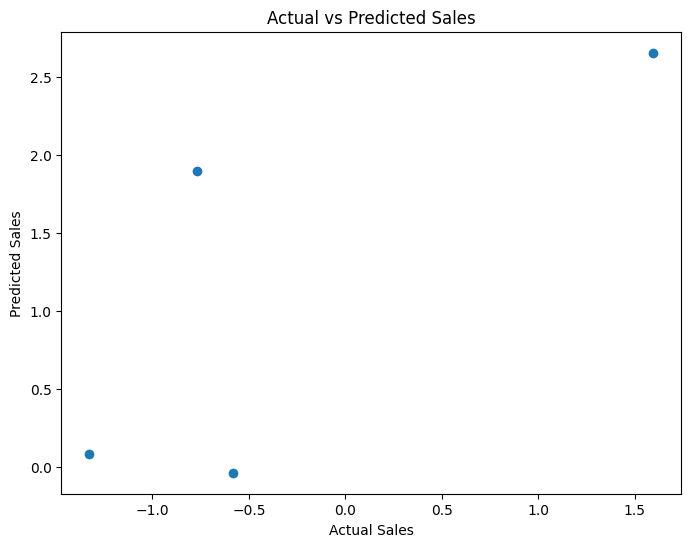

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

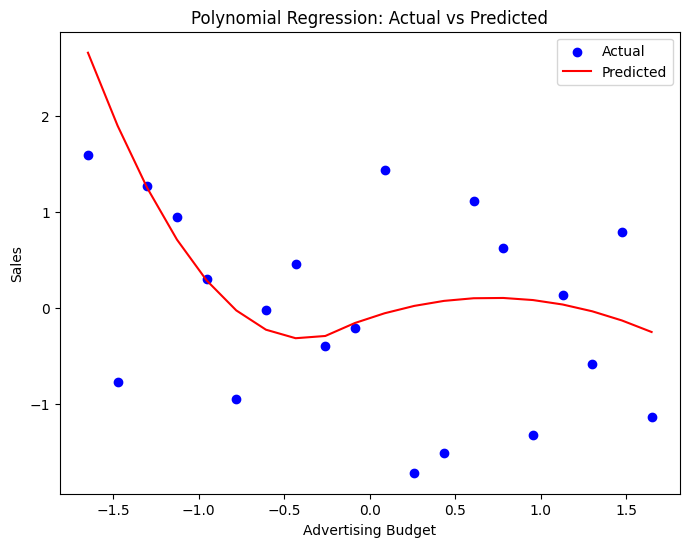

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['advertising_budget'], df['sales'], color='blue', label='Actual')
plt.plot(df['advertising_budget'], model.predict(poly.transform(df[['advertising_budget', 'social_media_followers']])), color='red', label='Predicted')
plt.xlabel("Advertising Budget")
plt.ylabel("Sales")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.show()